  Patient  Gender  Age  Height  Weight   IAH  Cervical        BMI
0   P0002  hombre   56     174     119  29.6      48.0  39.305060
1   P0004  hombre   39     168      78  19.7      42.0  27.636054
2   P0005  hombre   32     173      80   9.0      40.0  26.729927
3   P0006  hombre   32     190     109   2.0      42.0  30.193906
4   P0007  hombre   39     169      86  34.0      42.0  30.110991


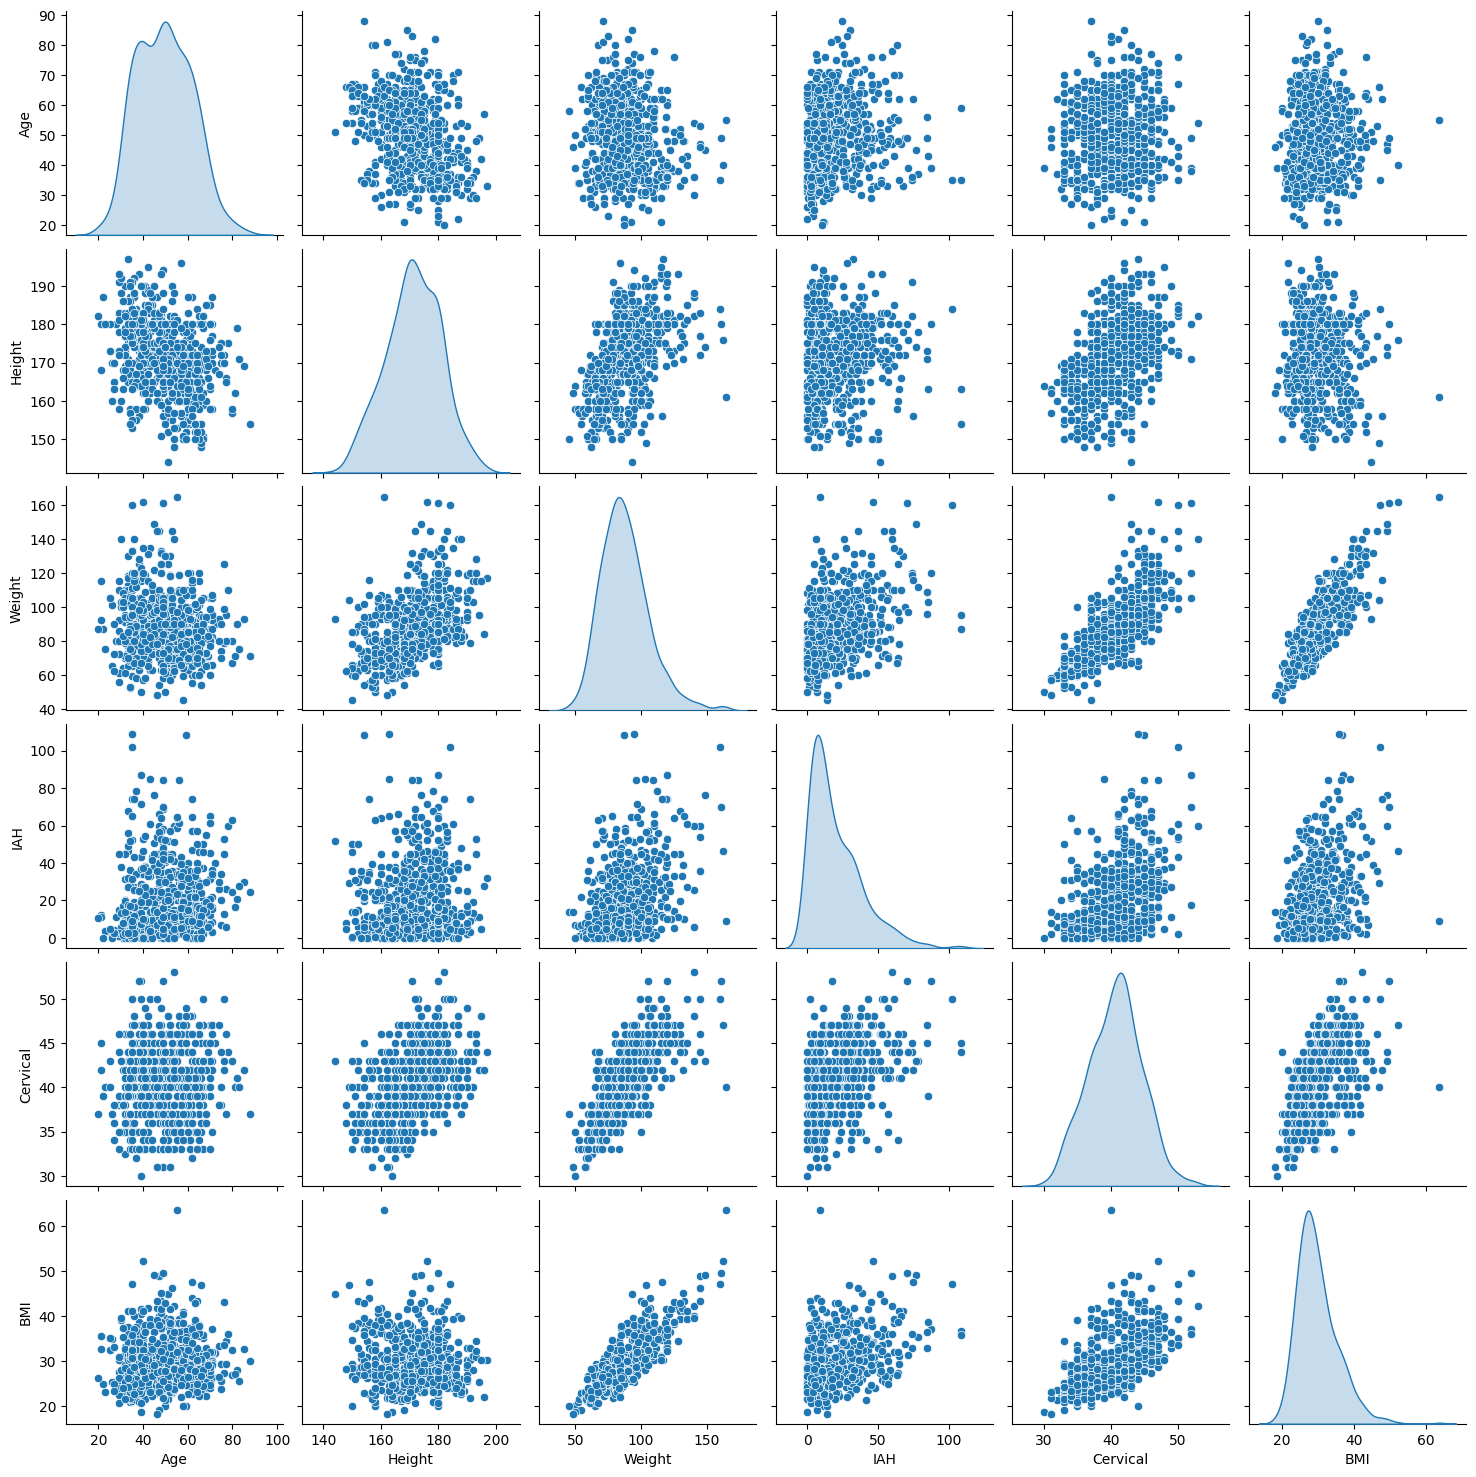

C:\Users\luisa\AppData\Local\Temp\ipykernel_6292\176132917.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(columns=['Patient']).corr()


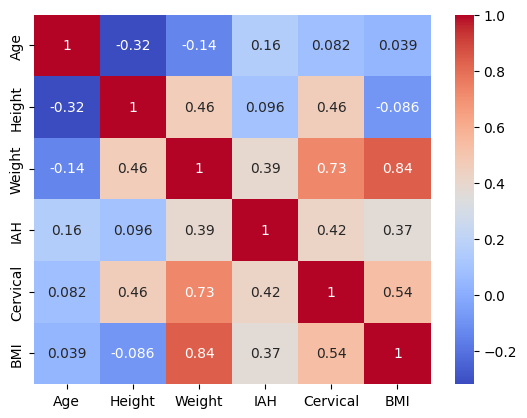

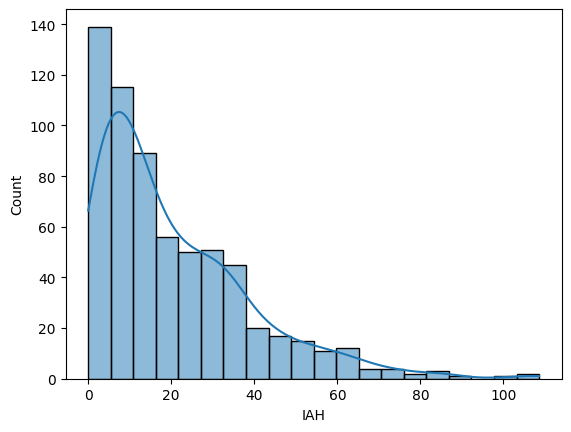

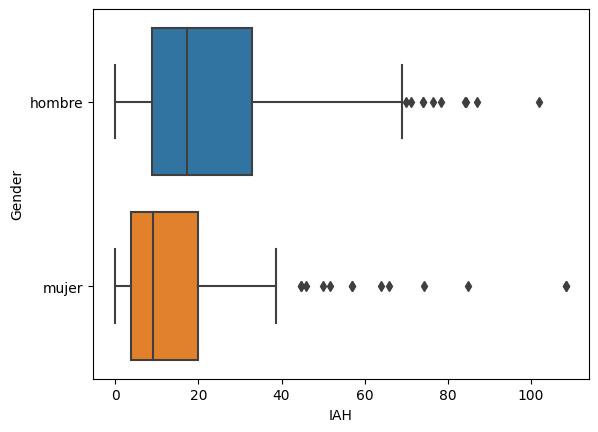

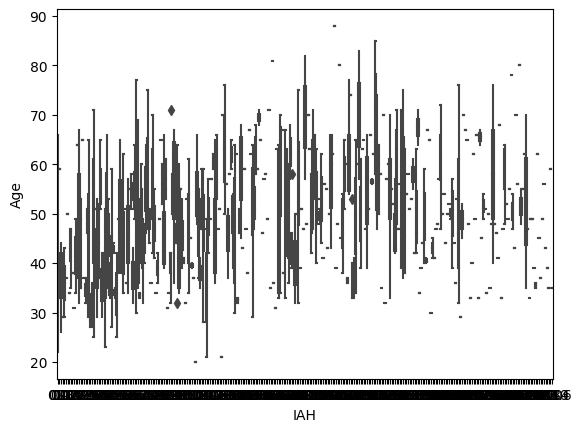

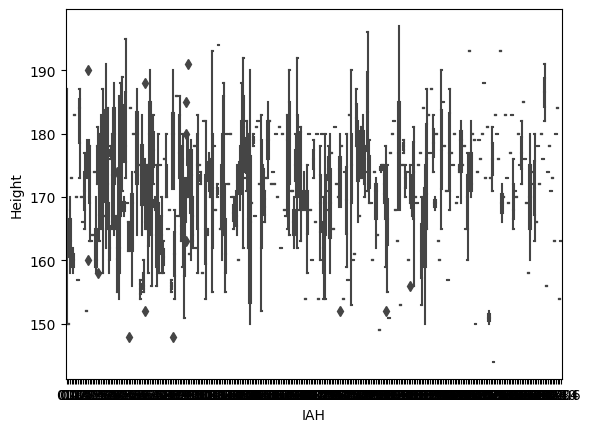

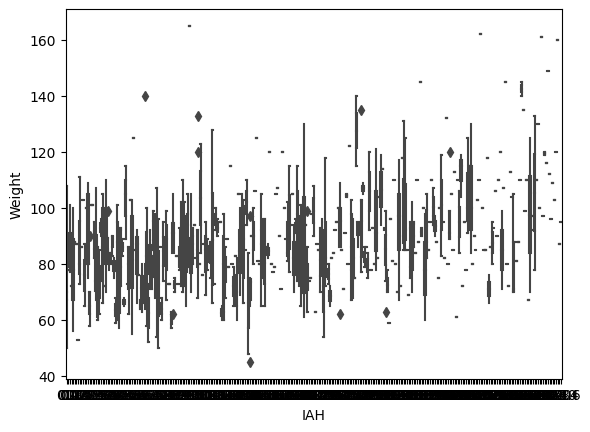

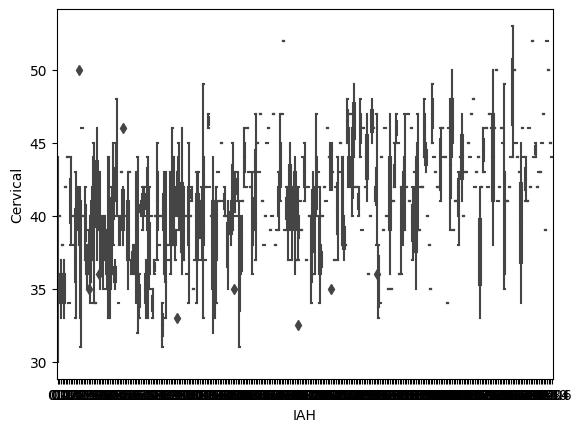

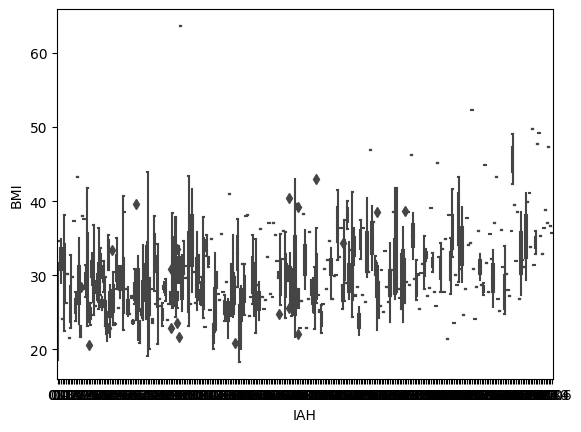

In [2]:
import pandas as pd
import seaborn as sns

# Read the Excel file
df = pd.read_excel('DATA/Copilot_OSA_DB_UPM.xlsx')

# Calculate BMI and add it as a new column
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Display the first few rows of the dataframe to verify
print(df.head())

# Perform EDA
import matplotlib.pyplot as plt

# Pairplot to see the relationships
sns.pairplot(df.drop(columns=['Patient']), diag_kind='kde')
plt.show()

# Correlation matrix
corr_matrix = df.drop(columns=['Patient']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribution of IAH
sns.histplot(df['IAH'], kde=True)
plt.show()

# Boxplots to see the distribution of features with respect to IAH
features = df.columns.drop(['Patient', 'IAH'])
for feature in features:
    sns.boxplot(x='IAH', y=feature, data=df)
    plt.show()

In [3]:
from scipy.stats import pearsonr

# Calculate the p-values for the correlation coefficients
p_values = corr_matrix.copy()
for row in corr_matrix.index:
    for col in corr_matrix.columns:
        if row != col:
            _, p_value = pearsonr(df[row], df[col])
            p_values.loc[row, col] = p_value
        else:
            p_values.loc[row, col] = 1.0  # p-value for correlation with itself is 1

# Display the p-values
print(p_values.round(4))

             Age  Height  Weight     IAH  Cervical     BMI
Age       1.0000  0.0000  0.0004  0.0001    0.0378  0.3291
Height    0.0000  1.0000  0.0000  0.0154    0.0000  0.0303
Weight    0.0004  0.0000  1.0000  0.0000    0.0000  0.0000
IAH       0.0001  0.0154  0.0000  1.0000    0.0000  0.0000
Cervical  0.0378  0.0000  0.0000  0.0000    1.0000  0.0000
BMI       0.3291  0.0303  0.0000  0.0000    0.0000  1.0000
